## Module 1: Loading and Filtering Data

In [2]:
%%bash
pip install --quiet scprep

In [1]:
import pandas as pd
import scprep

import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
#reading in heart data
data = scprep.io.load_csv('../FinalProject/FACS/Heart-counts.csv',
                          cell_axis='row', sparse=True).transpose()

data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
B12.MAA000398.3_9_M.1.1,0.0,272.0,93.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,68.0,1.0,0.0,0.0,17.0,0.0
D16.MAA000398.3_9_M.1.1,0.0,21.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,389.0,3.0,6.0,0.0,41.0,0.0
F10.MAA000398.3_9_M.1.1,0.0,54.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,28.0,45.0,0.0,31.0,0.0,19.0,0.0
L17.MAA000398.3_9_M.1.1,0.0,21.0,0.0,27.0,0.0,27.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,38.0,0.0,0.0,11.0,0.0
N18.MAA000398.3_9_M.1.1,0.0,73.0,82.0,66.0,0.0,0.0,58.0,0.0,0.0,68.0,...,0.0,22.0,0.0,14.0,97.0,99.0,124.0,0.0,39.0,0.0


In [5]:
data.shape

(6002, 23433)

In [6]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])

metadata = pd.read_csv('../FinalProject/metadata_FACS.csv', index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index

metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex
B12.MAA000398.3_9_M.1.1,MAA000398,3_9_M,Heart,LA,Viable,M
D16.MAA000398.3_9_M.1.1,MAA000398,3_9_M,Heart,LA,Viable,M
F10.MAA000398.3_9_M.1.1,MAA000398,3_9_M,Heart,LA,Viable,M
L17.MAA000398.3_9_M.1.1,MAA000398,3_9_M,Heart,LA,Viable,M
N18.MAA000398.3_9_M.1.1,MAA000398,3_9_M,Heart,LA,Viable,M


<AxesSubplot:title={'center':'Library Size, No Filter'}, xlabel='Library size', ylabel='Number of cells'>

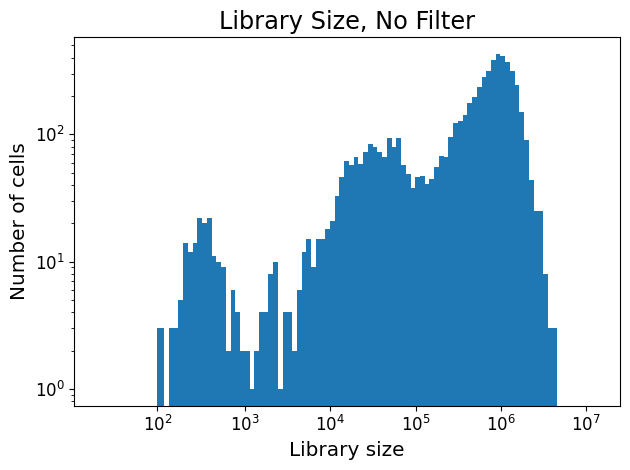

In [7]:
scprep.plot.plot_library_size(data, log=True, title='Library Size, No Filter')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

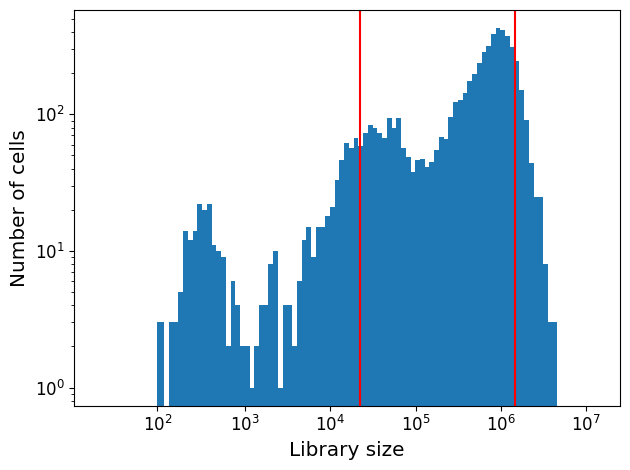

In [18]:
percentiles = ( 10 , 90 )

scprep.plot.plot_library_size(data, percentile=percentiles)

In [19]:
percentiles = ( 10 , 90 )

data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=percentiles)

<AxesSubplot:title={'center':'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

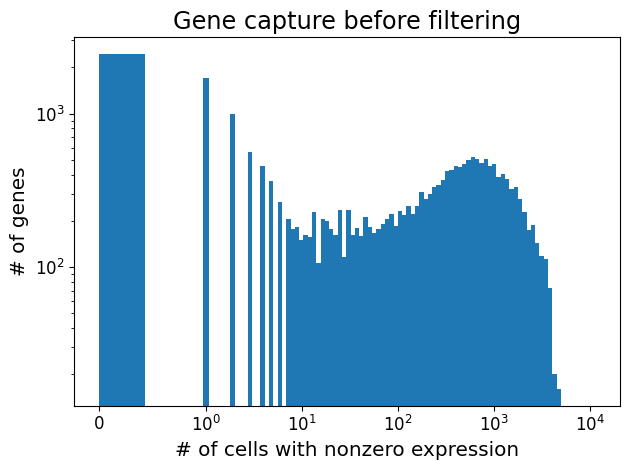

In [20]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

<AxesSubplot:title={'center':'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

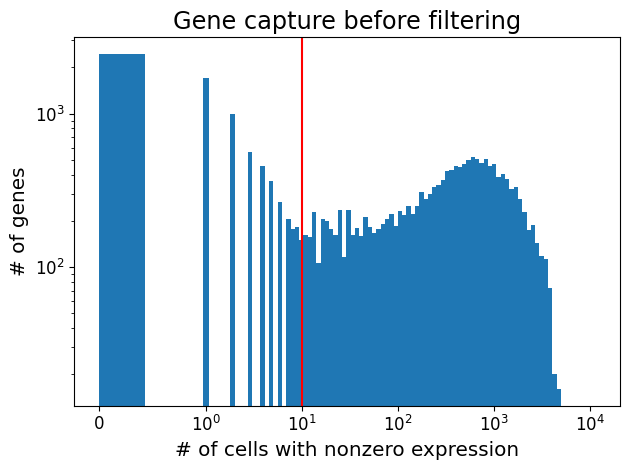

In [21]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), 
                      cutoff = 10,
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [22]:
cutoff = 10
data = scprep.filter.filter_rare_genes(data, min_cells=cutoff)

<AxesSubplot:title={'center':'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

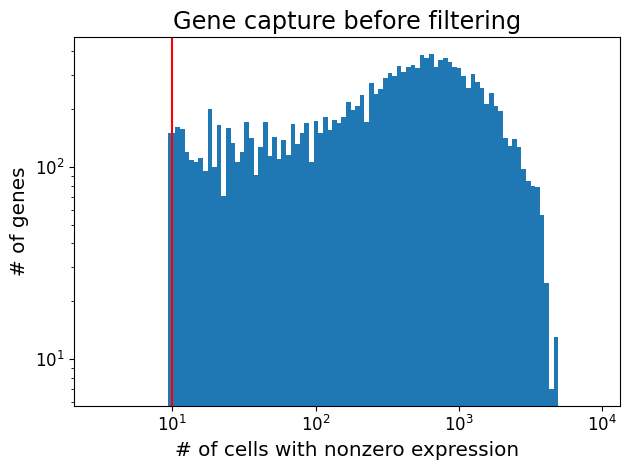

In [23]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), 
                      cutoff = 10,
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [24]:
data.shape

(4800, 16087)

<AxesSubplot:title={'center':'Library size before normalization'}, xlabel='Library size', ylabel='Number of cells'>

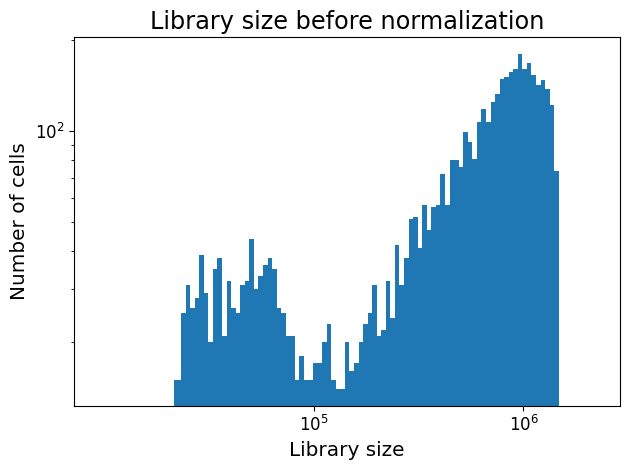

In [25]:
scprep.plot.plot_library_size(data, title='Library size before normalization')

In [26]:
data, metadata['library_size'] = scprep.normalize.library_size_normalize(data, return_library_size=True)

<AxesSubplot:title={'center':'Library size after normalization'}, xlabel='Library size', ylabel='Number of cells'>

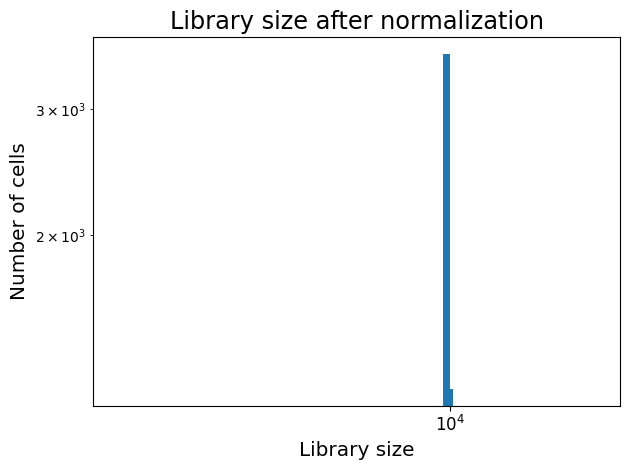

In [27]:
scprep.plot.plot_library_size(data, title='Library size after normalization')

<AxesSubplot:title={'center':'Gene Counts'}, xlabel='Count', ylabel='Number of Genes'>

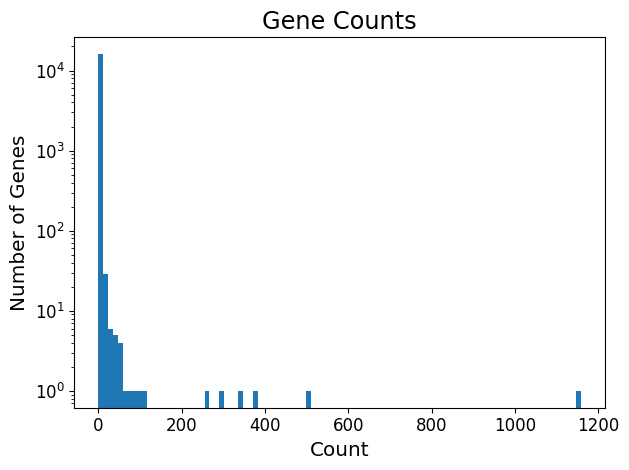

In [28]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= 'Gene Counts',
                     xlabel= 'Count',
                     ylabel= 'Number of Genes')

In [29]:
data = scprep.transform.sqrt(data)

<AxesSubplot:title={'center':'gene counts after transormation'}, xlabel='Count', ylabel='number of genes'>

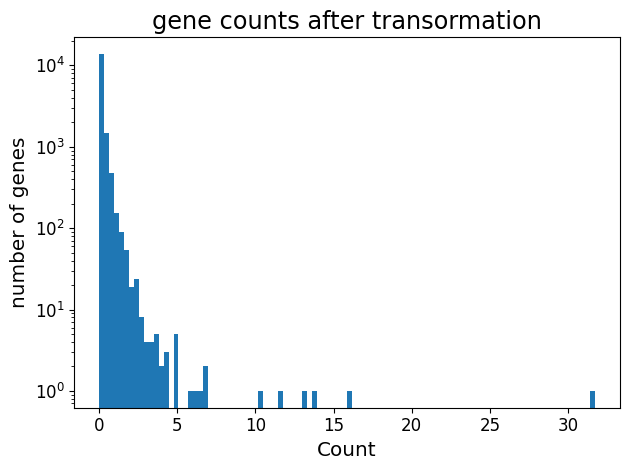

In [30]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= 'gene counts after transormation',
                     xlabel= 'Count',
                     ylabel= 'number of genes')

In [31]:
data.to_pickle("heart_counts.pickle.gz") #file.pickle.gz
metadata.to_pickle("metadata.pickle.gz")  #file.pickle.gz

## Module 2: Dimensionality Reduction and Clustering

In [101]:
%%bash
pip install --quiet scprep
pip install --quiet umap-learn

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import umap
import scprep
import os

In [103]:
# loading in saved data from Module 1
data = pd.read_pickle('heart_counts.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

In [35]:
data_pca = scprep.reduce.pca(data, n_components=50, method = 'dense')
data_umap = umap.UMAP().fit_transform(data_pca.iloc[:,:50])
data_umap = pd.DataFrame(data_umap, index = data.index)

In [36]:
data_umap.head

<bound method NDFrame.head of                                  0          1
B12.MAA000398.3_9_M.1.1  11.209707  19.672934
D16.MAA000398.3_9_M.1.1   0.536778   8.669103
F10.MAA000398.3_9_M.1.1  -5.043564   4.921186
L17.MAA000398.3_9_M.1.1  -5.063076   4.958689
N18.MAA000398.3_9_M.1.1  12.983688  20.297380
...                            ...        ...
F3.MAA100097.3_38_F.1.1  13.074716   4.803255
D6.MAA100097.3_39_F.1.1  13.013445   4.773640
F1.MAA100097.3_38_F.1.1  13.513639   4.520435
A9.MAA100097.3_39_F.1.1  17.503092   5.110715
D8.MAA100097.3_39_F.1.1  13.065473   4.784972

[4800 rows x 2 columns]>

In [39]:
data_umap.to_pickle("umap.pickle.gz") #file.pickle.gz

In [105]:
%matplotlib inline

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

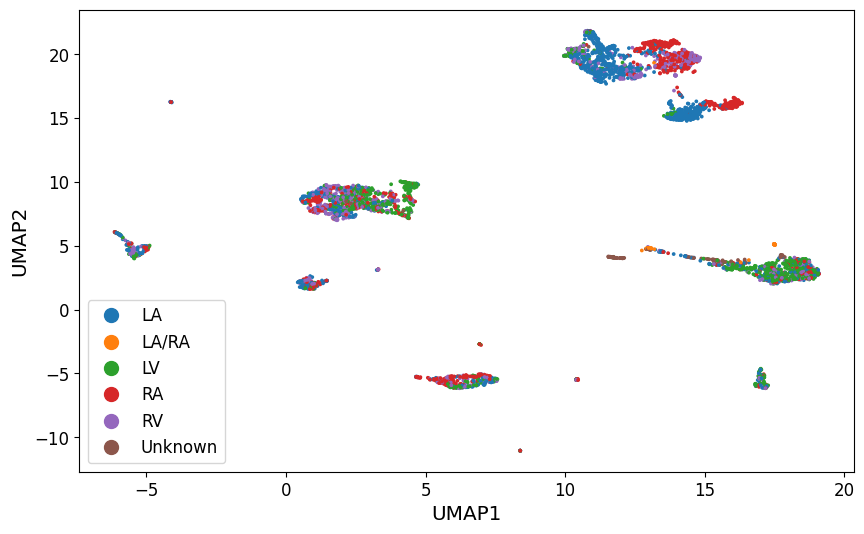

In [38]:
fig, ax = plt.subplots(figsize=(10,6)) 


scprep.plot.scatter2d( 
  data_umap, 
  c=metadata['subtissue'], ax=ax, label_prefix="UMAP"
)

In [104]:
data_umap = pd.read_pickle('umap.pickle.gz')

In [107]:
%%bash
pip install --quiet phenograph
pip install --quiet tasklogger
pip install --quiet graphtools

In [108]:
import sklearn
import sklearn.cluster
import sklearn.manifold
import graphtools as gt
import phenograph
import matplotlib.pyplot as plt
import tasklogger

%matplotlib inline

In [42]:
# phenograph clustering

with tasklogger.log_task("phenograph"):
    phenograph_clusters, _, _ = phenograph.cluster(data_umap)

Calculating phenograph...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.042212486267089844 seconds
Jaccard graph constructed in 0.9276878833770752 seconds
Wrote graph to binary file in 0.10934972763061523 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.94798
Louvain completed 21 runs in 1.5955593585968018 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.8552427291870117 seconds
Calculated phenograph in 2.86 seconds.


In [43]:
# Predicting cluster number


from sklearn.model_selection import train_test_split
from itertools import combinations
from scipy import sparse

def get_comemberships(dat, n_clusters, model, kwargs={}):
  ## helper function
  # returns comembership matrix and model
  model = model(n_clusters=n_clusters, **kwargs)
  model.fit(dat)

  labels = model.predict(dat)
  comember = labels_to_mat(labels, n_clusters, N=dat.shape[0])

  return comember, model

def labels_to_mat(labels, n_clusters, N):
  ## helper function
  # comembership matrix helper

  # create and fill an NxN co-membership matrix
  comember = np.zeros((N, N), dtype=bool)
  for i in range(n_clusters):
    match_idx = np.where(labels==i)[0]

    # slow, memory safe (we will symmetrize + add diagonal after)
    match_idx = iter(combinations(match_idx, 2))
    for (j,k) in match_idx:
      comember[j,k] = True

  # transpose here is memory bottleneck
  comember = np.maximum(comember, comember.transpose())
  comember[np.diag_indices_from(comember)] = True

  # sparsify output for storage space
  comember = sparse.csr_matrix(comember)
  return comember

def prediction_strength(full_dat, n_clusters, n_CV=3,
                        verbose=False, model=sklearn.cluster.KMeans,
                        kwargs={}):
  test_size = 1./n_CV
  res = []
  for i in range(n_CV):
    train_dat, test_dat = train_test_split(full_dat, test_size=test_size)
    N_test = test_dat.shape[0]
    __, train_model  = get_comemberships(train_dat, n_clusters, model=model, kwargs=kwargs)
    ground_truth, __ = get_comemberships(test_dat, n_clusters, model=model, kwargs=kwargs)

    pred_labels      = labels_to_mat(train_model.predict(test_dat), n_clusters, N_test)

    # when match_count is N_test**2, there is no error
    match_count      = ground_truth.minimum(pred_labels).sum()
    res.append(match_count/(N_test**2))

  if verbose:
    print(res)

  return np.mean(res)

In [ ]:
start = 5
end   = 15

pred_strengths = []

for i in range(start, end):
    print(i)
    pred_strengths.append(prediction_strength(full_dat=data,
                                            n_clusters=i, n_CV=3,
                        verbose=False, model=sklearn.cluster.KMeans,
                        kwargs={}))

5


([<matplotlib.axis.XTick at 0x7fe9cb129610>,
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '9'),
  Text(5, 0, '10'),
  Text(6, 0, '11'),
  Text(7, 0, '12'),
  Text(8, 0, '13'),
  Text(9, 0, '14'),
  Text(10, 0, '15'),
  Text(11, 0, '16'),
  Text(12, 0, '17'),
  Text(13, 0, '18')])

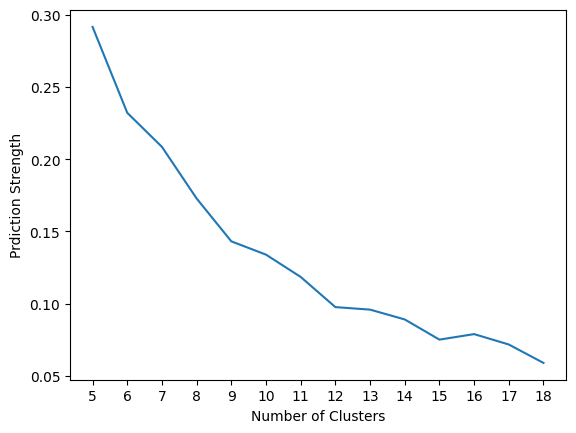

In [47]:
plt.plot(pred_strengths)
plt.xlabel('Number of Clusters')
plt.ylabel('Prdiction Strength')
plt.xticks(np.arange(len(pred_strengths)), np.arange(5, len(pred_strengths)+5))

In [48]:
# Kmeans clustering

with tasklogger.log_task("KMeans"):
    kmeans_clusters = sklearn.cluster.KMeans(n_clusters=7).fit_predict(data_umap)

Calculating KMeans...
Calculated KMeans in 0.05 seconds.


In [49]:
#spectral clustering

G = gt.Graph(data_umap)
G_igraph = G.to_igraph()

with tasklogger.log_task("Spectral clustering"):
    spec_op = sklearn.cluster.SpectralClustering(n_clusters=7,affinity='precomputed')
    spectral_clusters = spec_op.fit_predict(G.K)

Calculating Spectral clustering...


/srv/conda/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Calculated Spectral clustering in 27.22 seconds.


In [50]:
#clustering renumbering

clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters,
               'Spectral':spectral_clusters}

for alg in clusterings:
    cl_nu = scprep.utils.sort_clusters_by_values(clusterings[alg], -data_umap.iloc[:,0])
    clusterings[alg] = cl_nu

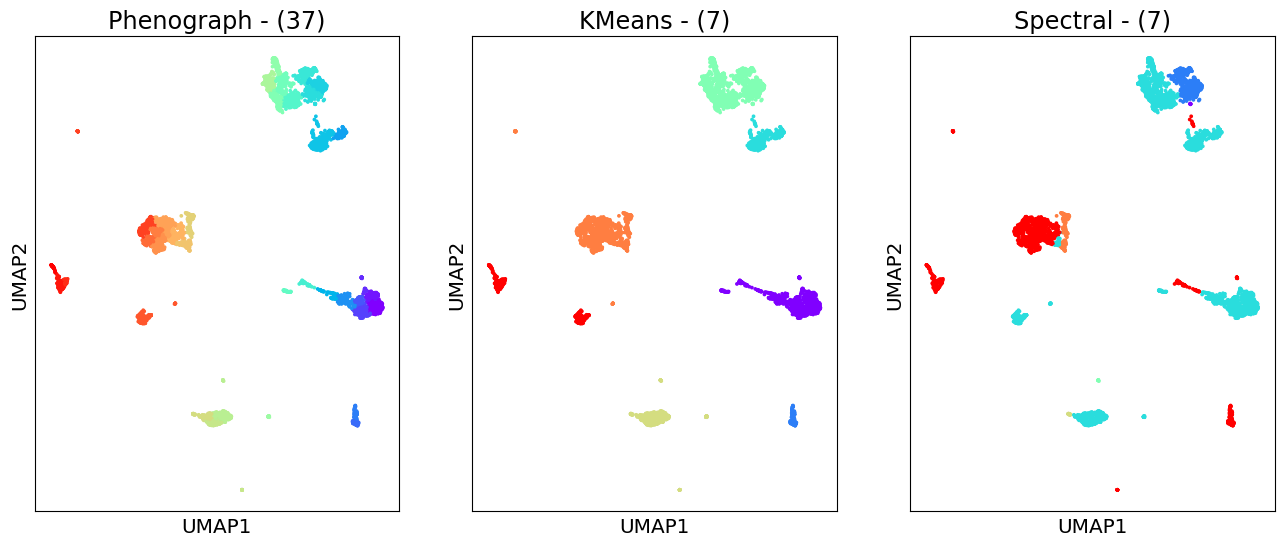

In [51]:
fig, axes = plt.subplots(1,3, figsize=(16,16), subplot_kw={'aspect':'equal'})

for ax, algorithm in zip(axes.flatten(), clusterings):
  scprep.plot.scatter2d(data_umap, c=clusterings[algorithm], cmap=plt.cm.rainbow,
                        title='{} - ({})'.format(algorithm, len(np.unique(clusterings[algorithm]))),
                        ticks=False, label_prefix="UMAP", legend=False, discrete=True,
                        ax=ax)

## Module 3: Gene Differential Analysis

In [52]:
clusters = clusterings['KMeans']

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

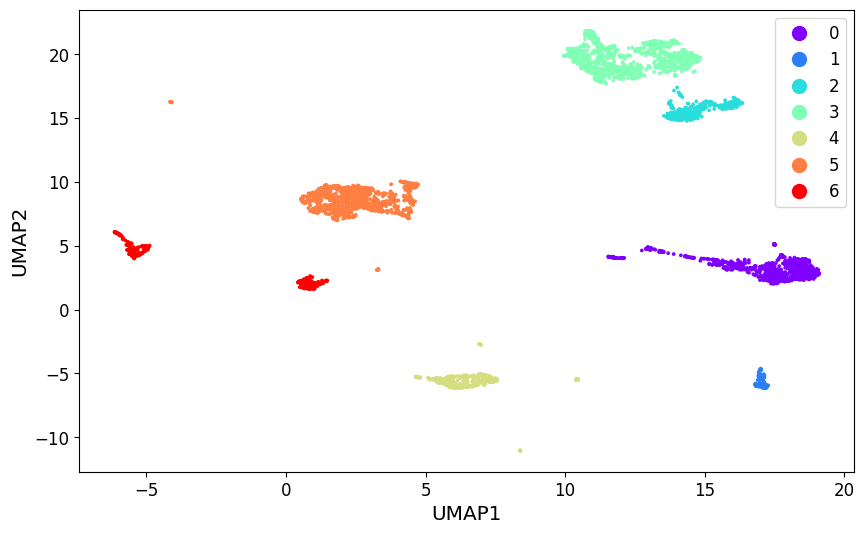

In [116]:
fig, ax = plt.subplots(figsize=(10,6)) 


scprep.plot.scatter2d( 
  data_umap, cmap=plt.cm.rainbow,
  c=clusters, ax=ax, legend=True, discrete=True,
   label_prefix="UMAP"
)

In [ ]:
atria_genes = ['Nppa',
               'Cadm2',
               'Nav2', 
               'Prrx2',
               'Gpr77',
               'Ppfia2',
               'Rgs2',
               'Tagln',
               'Adamts9',
               'Colec11',
               'Itga1']

Nppa
Cadm2
Nav2
Prrx2
Gpr77
Ppfia2
Rgs2
Tagln
Adamts9
Colec11
Itga1


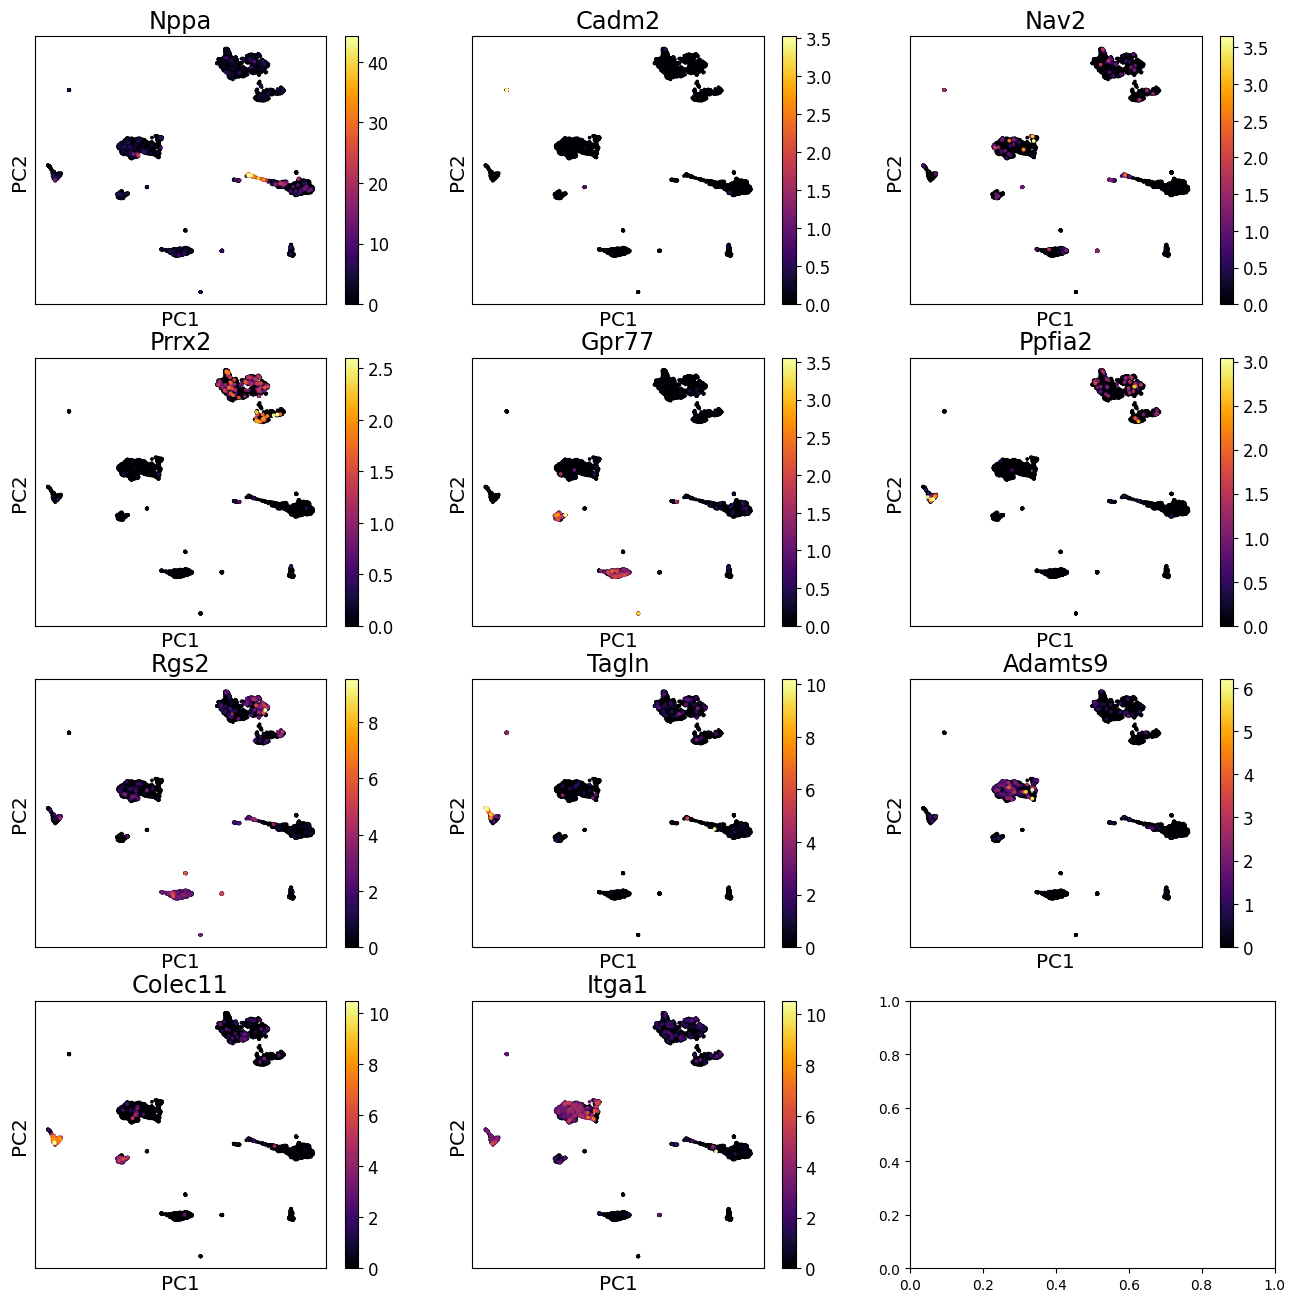

In [109]:
fig, axes = plt.subplots(4,3, figsize=(16,16))

for gene, ax in zip(atria_genes, axes.flatten()):
    print(gene)
    expression = scprep.select.select_cols(data, exact_word=gene)
    

    sort_index = expression.sort_values().index
    

    scprep.plot.scatter2d(data_umap.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                       title=gene, ticks=None, label_prefix='PC', ax= ax)

In [111]:
data_sparse = scprep.utils.SparseDataFrame(data)

In [112]:
curr_cluster = 2
ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

In [113]:
top_genes_2 = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

In [114]:
gene_dict= {}
for gene in atria_genes:
    pres = top_genes_2.isin([gene]).any()
    gene_dict[gene] = pres
gene_dict

{'Nppa': False,
 'Cadm2': False,
 'Nav2': False,
 'Prrx2': False,
 'Gpr77': False,
 'Ppfia2': False,
 'Rgs2': False,
 'Tagln': False,
 'Adamts9': False,
 'Colec11': False,
 'Itga1': False}

In [115]:
top_genes_2.head(n=10)

Gsn           57.504326
Dcn           55.960090
Dpt           55.672061
Nfia          43.811139
Sod1          41.750977
Cd36          40.793645
Fabp4         40.683288
Notch2        40.319566
Slc39a1       39.895626
ERCC-00130    39.713634
Name: ttest, dtype: float64

In [117]:
curr_cluster = 3
ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

In [118]:
top_genes_3 = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

In [119]:
gene_dict= {}
for gene in atria_genes:
    pres = top_genes_3.isin([gene]).any()
    gene_dict[gene] = pres
gene_dict

{'Nppa': False,
 'Cadm2': False,
 'Nav2': False,
 'Prrx2': False,
 'Gpr77': False,
 'Ppfia2': False,
 'Rgs2': False,
 'Tagln': False,
 'Adamts9': False,
 'Colec11': False,
 'Itga1': False}

In [120]:
top_genes_3.head(n=10)

Dcn         103.921054
Serping1     90.923571
Fbln1        82.297139
Lum          78.813920
Gsn          78.138157
Loxl1        73.160352
Dpt          72.775256
Igfbp4       71.860090
Serpinf1     68.943559
Htra3        67.517924
Name: ttest, dtype: float64